In [1]:
import json 
import pandas as pd 
import requests
from pprint import pprint
import NameDataModule as NDM

In [2]:
popular_movies_df = NDM.GetPopularMovies()
print("Get Done, Son!")

years = range(13,18)

Top_Movies_DF = pd.DataFrame()

for y in years:
    year = f'20{y}'
    top20_movies = popular_movies_df.loc[popular_movies_df['release_date'].str.contains(year)==True]
    top20_moviesen = top20_movies[top20_movies['original_language']=='en']
    top20_moviesen = top20_moviesen.sort_values('popularity', ascending=False).head(10)
    top20_movies = top20_moviesen.drop(columns=['adult','backdrop_path','genre_ids','overview','poster_path','video'])
    Top_Movies_DF = Top_Movies_DF.append(top20_movies)


apikey = 'e3ea857e'
characters = []
for movie in Top_Movies_DF['title']:
    Character_List = NDM.GetCharacters(apikey, movie)
    
    if Character_List != []:
        characters.append(Character_List)
    else:
        characters.append('')
        
Top_Movies_DF['characters'] = characters
print("Get Done, Son!")

Top_Movies_DF_clean = Top_Movies_DF[Top_Movies_DF['characters'] != ''].reset_index(drop=True)
Top_Movies_DF_clean.head()

In [6]:
popular_tv_shows_df = NDM.GetPopularTVShows()
print("Get Done, Son!")

years = range(13,18)

Top_Shows_DF = pd.DataFrame()

for y in years:
    year = f'20{y}'
    top_shows = popular_tv_shows_df.loc[popular_tv_shows_df['first_air_date'].str.contains(year)==True]
    top_showsen = top_shows[top_shows['original_language']=='en']
    top10_showsen = top_showsen.sort_values('popularity', ascending=False).head(10)
    top10_shows = top10_showsen.drop(columns=['backdrop_path','genre_ids','overview','poster_path'])
    Top_Shows_DF = Top_Shows_DF.append(top10_shows)

apikey = 'e3ea857e'
characters = []
for show in Top_Shows_DF['original_name']:
    Character_List = NDM.GetCharacters(apikey, show)
    
    if Character_List != []:
        characters.append(Character_List)
    else:
        characters.append('')
        
Top_Shows_DF['characters'] = characters
print("Get Done, Son!")

Top_Shows_DF = Top_Shows_DF[Top_Shows_DF['characters'] != '']
Top_Shows_DF_clean = Top_Shows_DF[Top_Shows_DF['characters'] != '[unknown episodes ]'].reset_index(drop=True)
Top_Shows_DF_clean.head()

In [1]:
FancyNewDF = pd.DataFrame()
for n in Top_Movies_DF_clean.index:
    movie = Top_Movies_DF_clean['title']
    names = Top_Movies_DF_clean['title']
    for i in range(0,len(names)):
        firstname = names[i].split()[0].upper()
        if firstname not in firstnames:
            firstnames.append(firstname)

NameError: name 'pd' is not defined

In [84]:
BabyNames = pd.read_csv('Resources/most-popular-baby-names-2005-current-3.csv')
BabyNames

,YEAR,Gender,RANK,Name,Count
0,2005,Female,1,EMILY,3268
1,2005,Female,2,ASHLEY,2770
2,2005,Female,3,SAMANTHA,2483
3,2005,Female,4,ISABELLA,2333
4,2005,Female,5,MIA,2172
5,2005,Female,6,NATALIE,2035
6,2005,Female,7,SOPHIA,1876
7,2005,Female,8,EMMA,1626
8,2005,Female,9,ALYSSA,1612
9,2005,Female,10,MADISON,1523


In [13]:
EmilyCount = BabyNames[BabyNames['Name']=='EMILY']['Count']
Year = BabyNames[BabyNames['Name']=='EMILY']['YEAR']
EmilyCount.sum()

32215

In [14]:
import matplotlib.pyplot as plt

plt.plot(Year, EmilyCount)

In [16]:
firstnames = []
for names in Top_Movies_DF_clean['characters']:
    for i in range(0,len(names)):
        firstname = names[i].split()[0].upper()
        if firstname not in firstnames:
            firstnames.append(firstname)
print(len(firstnames))
for names in Top_Shows_DF_clean['characters']:
    for i in range(0,len(names)):
        firstname = names[i].split()[0].upper()
        if firstname not in firstnames:
            firstnames.append(firstname)
print(firstnames)

465
['ANNA', 'ELSA', 'KRISTOFF', 'OLAF', 'HANS', 'DUKE', 'PABBIE', 'OAKEN', 'KAI', 'BULDA', 'BISHOP', 'KING', 'YOUNG', 'GRU', 'LUCY', 'EDUARDO', 'MARGO', 'DR.', 'SILAS', 'AGNES', 'EDITH', 'ANTONIO', 'SHANNON', 'KEVIN', 'ADDITIONAL', 'MARCUS', 'MICHAEL', 'DANNY', 'MATT', 'GULAB', 'ERIK', 'SHANE', 'JAMES', 'CLARK', 'LOIS', 'GENERAL', 'MARTHA', 'JOR-EL', 'FAORA-UL', 'COLONEL', 'JONATHAN', 'LARA', 'PERRY', 'TONY', 'PEPPER', 'ALDRICH', 'MAYA', 'HAPPY', 'TREVOR', 'SAVIN', 'BRANDT', 'JARVIS', 'PRESIDENT', 'HARLEY', 'VICE', 'DOCTOR', 'JORDAN', 'DONNIE', 'NAOMI', 'MARK', 'AGENT', 'MAX', 'BRAD', 'MANNY', 'JEAN', 'AUNT', 'TERESA', 'LEAH', 'CAPTAIN', 'CHANTALLE', 'NICKY', 'MIKE', 'CONNOR', 'FORBES', 'KANG', 'SPEAKER', 'SECRET', 'SECRETARY', 'ROMA', "O'NEIL", 'RAY', 'THOR', 'JANE', 'LOKI', 'ODIN', 'MALEKITH', 'SIF', 'FANDRAL', 'VOLSTAGG', 'HOGUN', 'HEIMDALL', 'FRIGGA', 'ALGRIM', 'DARCY', 'EIR', 'MARY', 'CHARLIE', 'ZOEY', 'BLOODY', 'POLITE', 'HENRY', 'MRS.', 'MR.', 'FREAK', 'FEMALE', 'THEODORE', 'PA

In [17]:
for name in firstnames:
    NameCount = BabyNames[BabyNames['Name']==name]['Count']
    Year = BabyNames[BabyNames['Name']==name]['YEAR']

    if NameCount.sum() != 0:
        import matplotlib.pyplot as plt

        plt.plot(Year, NameCount)
        file = f'Resources/{name}.png'
        plt.savefig(file)
        plt.clf()

<Figure size 432x288 with 0 Axes>

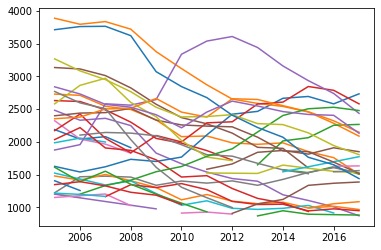

In [18]:
for name in firstnames:
    NameCount = BabyNames[BabyNames['Name']==name]['Count']
    Year = BabyNames[BabyNames['Name']==name]['YEAR']

    if NameCount.sum() != 0:
        import matplotlib.pyplot as plt

        plt.plot(Year, NameCount)

file = f'Resources/AllNames.png'
plt.savefig(file)
plt.show()

In [19]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [20]:
for row in Top_Movies_DF_clean.index:
    Top_Movies_DF_clean['characters'][row] = str(Top_Movies_DF_clean['characters'][row])

C:\Users\farad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

Names_that_went_up = []
for name in firstnames:
    try:
        release_dates = [Top_Movies_DF_clean[Top_Movies_DF_clean['characters'].str.contains(name.lower())]['release_date'].values[0].split('-')[0]]
        Count = list(BabyNames[BabyNames['Name'] == name]['Count'])
        Year = list(BabyNames[BabyNames['Name'] == name]['YEAR'])
        print(name, title, release_date)
        title = [Top_Movies_DF_clean[Top_Movies_DF_clean['characters'].str.contains(name.lower())]['title'].values[0]]
        for release_date in release_dates:
            ReleaseYearIndex = Year.index(int(release_date))

            PreReleaseYears = Year[:ReleaseYearIndex]
            PostReleaseYears = Year[ReleaseYearIndex:]

            PreReleaseCount = Count[:ReleaseYearIndex]
            PostReleaseCount = Count[ReleaseYearIndex:]

            (preslope, intercept, _, _, _) = linregress(PreReleaseYears, PreReleaseCount)
            (postslope, intercept, _, _, _) = linregress(PostReleaseYears, PostReleaseCount)

            if postslope > preslope:
                if name not in Names_that_went_up:
                    MyBigDict = {'name':name, 'movie':title, 'release date':release_date}
                    Names_that_went_up.append(MyBigDict)
    except:
        pass
    try:
        release_dates = [Top_Shows_DF_clean[Top_Shows_DF_clean['characters'].str.contains(name.lower())]['air_date'].values[0].split('-')[0]]
        Count = list(BabyNames[BabyNames['Name'] == name]['Count'])
        Year = list(BabyNames[BabyNames['Name'] == name]['YEAR'])
        print(name, title, release_date)
        title = [Top_Shows_DF_clean[Top_Shows_DF_clean['characters'].str.contains(name.lower())]['original_name'].values[0]]
        for release_date in release_dates:
            ReleaseYearIndex = Year.index(int(release_date))

            PreReleaseYears = Year[:ReleaseYearIndex]
            PostReleaseYears = Year[ReleaseYearIndex:]

            PreReleaseCount = Count[:ReleaseYearIndex]
            PostReleaseCount = Count[ReleaseYearIndex:]

            (preslope, intercept, _, _, _) = linregress(PreReleaseYears, PreReleaseCount)
            (postslope, intercept, _, _, _) = linregress(PostReleaseYears, PostReleaseCount)

            if postslope > preslope:
                if name not in Names_that_went_up:
                    MyBigDict = {'name':name, 'TV show':title, 'air date':release_date}
                    Names_that_went_up.append(MyBigDict)
    except:
        pass
print(Names_that_went_up)

ANNA ['Inside Out'] 2015
HANS ['The Wolf of Wall Street'] 2013
DR. ['The Martian'] 2015
EDITH ['Iron Man 3'] 2013
VICE ['Guardians of the Galaxy'] 2014
THOR ['Olympus Has Fallen'] 2013
MR. ['The Hunger Games: Mockingjay - Part 1'] 2014
AVI ['London Has Fallen'] 2016
MS. ['Iron Man 3'] 2013
THE ['Interstellar'] 2014
OIN ['Despicable Me 2'] 2013
ORI ['The Hobbit: The Battle of the Five Armies'] 2014
AVA ['John Wick'] 2014
NICK ['Maleficent'] 2014
RAND ['The Hunger Games: Mockingjay - Part 1'] 2014
LT. ['Iron Man 3'] 2013
ANGER ['Man of Steel'] 2013
RICK ['The Purge'] 2013
MITCH ['The Wolf of Wall Street'] 2013
BETH ['The Hunger Games: Mockingjay - Part 1'] 2014
RICH ['Gone Girl'] 2014
EMMA ['Iron Man 3'] 2013
LEX ['Jupiter Ascending'] 2015
MALE ['Terminator Genisys'] 2015
TALL ['The Purge'] 2013
ANNE ['The Wolf of Wall Street'] 2013
EGO ['Whiplash'] 2014
RED ['John Wick'] 2014
LAKE ['Guardians of the Galaxy'] 2014
TASHA ['San Andreas'] 2015
CO ['Avengers: Age of Ultron'] 2015
NATHAN ['Ol

In [45]:
for name in firstnames:
    if name == 'AVA':
        print(name)

In [71]:
print(BabyNames[BabyNames['Name']=='EMILY']['Count'])

0      3268
50     3085
100    2952
150    2767
202    2529
252    2381
302    2387
353    2416
404    2279
455    2264
505    2138
556    1944
606    1805
Name: Count, dtype: int64


In [86]:
n = 0
writer = pd.ExcelWriter('3LittlePigs.xlsx', engine='xlsxwriter')
for name in firstnames:
    if name in list(BabyNames['Name']):
        print()
        n += 1
        name_data = BabyNames.groupby("Name").get_group(name.upper())
        print(name_data)
        sheet = f'Sheet{n}'
        name_data.to_excel(writer, sheet_name=sheet)
    
writer.save()


     YEAR Gender  RANK   Name  Count
44   2005   Male    20  KEVIN   2188
97   2006   Male    23  KEVIN   2043
144  2007   Male    20  KEVIN   2080
197  2008   Male    23  KEVIN   1912

     YEAR Gender  RANK     Name  Count
34   2005   Male    10  MICHAEL   2730
86   2006   Male    12  MICHAEL   2711
137  2007   Male    13  MICHAEL   2544
188  2008   Male    14  MICHAEL   2495
236  2009   Male    12  MICHAEL   2336
288  2010   Male    14  MICHAEL   2080
337  2011   Male    13  MICHAEL   2090
386  2012   Male    12  MICHAEL   1985
435  2013   Male    11  MICHAEL   1963
485  2014   Male    11  MICHAEL   1985
538  2015   Male    13  MICHAEL   1852
588  2016   Male    13  MICHAEL   1759
647  2017   Male    22  MICHAEL   1507

     YEAR Gender  RANK   Name  Count
497  2014   Male    23  JAMES   1575
546  2015   Male    21  JAMES   1530
594  2016   Male    19  JAMES   1620
646  2017   Male    21  JAMES   1508

     YEAR Gender  RANK      Name  Count
35   2005   Male    11  JONATHAN   2631


In [87]:

for name in firstnames:
    if name in list(BabyNames['Name']):
        name_data = BabyNames.groupby("Name").get_group(name.upper())
        print(name_data)


     YEAR Gender  RANK   Name  Count
44   2005   Male    20  KEVIN   2188
97   2006   Male    23  KEVIN   2043
144  2007   Male    20  KEVIN   2080
197  2008   Male    23  KEVIN   1912
     YEAR Gender  RANK     Name  Count
34   2005   Male    10  MICHAEL   2730
86   2006   Male    12  MICHAEL   2711
137  2007   Male    13  MICHAEL   2544
188  2008   Male    14  MICHAEL   2495
236  2009   Male    12  MICHAEL   2336
288  2010   Male    14  MICHAEL   2080
337  2011   Male    13  MICHAEL   2090
386  2012   Male    12  MICHAEL   1985
435  2013   Male    11  MICHAEL   1963
485  2014   Male    11  MICHAEL   1985
538  2015   Male    13  MICHAEL   1852
588  2016   Male    13  MICHAEL   1759
647  2017   Male    22  MICHAEL   1507
     YEAR Gender  RANK   Name  Count
497  2014   Male    23  JAMES   1575
546  2015   Male    21  JAMES   1530
594  2016   Male    19  JAMES   1620
646  2017   Male    21  JAMES   1508
     YEAR Gender  RANK      Name  Count
35   2005   Male    11  JONATHAN   2631
87  

In [91]:
MovieCharacters = []
for name in firstnames:
    try:
        release_dates = [Top_Movies_DF_clean[Top_Movies_DF_clean['characters'].str.contains(name.lower())]['release_date'].values[0].split('-')[0]]
        Count = list(BabyNames[BabyNames['Name'] == name]['Count'])
        Year = list(BabyNames[BabyNames['Name'] == name]['YEAR'])
        title = Top_Movies_DF_clean[Top_Movies_DF_clean['characters'].str.contains(name.lower())]['title'].values[0]
        for release_date in release_dates:
            if name not in MovieCharacters:
                MyBigDict = {'name':name, 'movie':title, 'release date':release_date}
                MovieCharacters.append(MyBigDict)
    except:
        pass
    try:
        release_dates = [Top_Shows_DF_clean[Top_Shows_DF_clean['characters'].str.contains(name.lower())]['air_date'].values[0].split('-')[0]]
        Count = list(BabyNames[BabyNames['Name'] == name]['Count'])
        Year = list(BabyNames[BabyNames['Name'] == name]['YEAR'])
        title = Top_Shows_DF_clean[Top_Shows_DF_clean['characters'].str.contains(name.lower())]['original_name'].values[0]
        for release_date in release_dates:
            if name not in MovieCharacters:
                MyBigDict = {'name':name, 'TV show':title, 'air date':release_date}
                MovieCharacters.append(MyBigDict)
    except:
        pass
    
MovieCharactersDF = pd.DataFrame(MovieCharacters)

In [92]:
MovieCharactersDF

,movie,name,release date
0,The Wolf of Wall Street,ANNA,2013
1,The Martian,HANS,2015
2,Iron Man 3,DR.,2013
3,Guardians of the Galaxy,EDITH,2014
4,Olympus Has Fallen,VICE,2013
5,The Hunger Games: Mockingjay - Part 1,THOR,2014
6,London Has Fallen,MR.,2016
7,Iron Man 3,AVI,2013
8,Interstellar,MS.,2014
9,Despicable Me 2,THE,2013
